In [1]:
import geopandas as gpd
import pandas as pd
import os
import matplotlib.pyplot as plt
from io import StringIO
from shapely.geometry import Point
import matplotlib
# Use your own path here
#os.chdir("")

from typing import Optional

import pickle
import numpy as np

pd.options.mode.chained_assignment = None
import joypy
import seaborn as sns

In [15]:
os.chdir("/Users/canyonfoot/Documents/python_proj/EPA-Hack-Day-Analysis")
UA_stats = pd.read_csv("data/processed/urban_area_statistics.csv").query("facility_count >= 10")

In [16]:
font = {'size'   : 22}
matplotlib.rc('font', **font)

In [17]:
old_names = ["pop_in_poverty_ratio","hispanic_pop_ratio","black_pop_ratio", "vacant_units_ratio", "renter_households_ratio", "white_pop_ratio", "median_home_value_ratio", "median_hh_income_ratio"]
new_names = ["Poverty rate", "Hispanic/Latino %", "Black %", "Vacant housing units", "Renter houshold %", "White %", "Median home value", "Median income"]
UA_stats = UA_stats.rename(columns=dict(zip(old_names, new_names)))

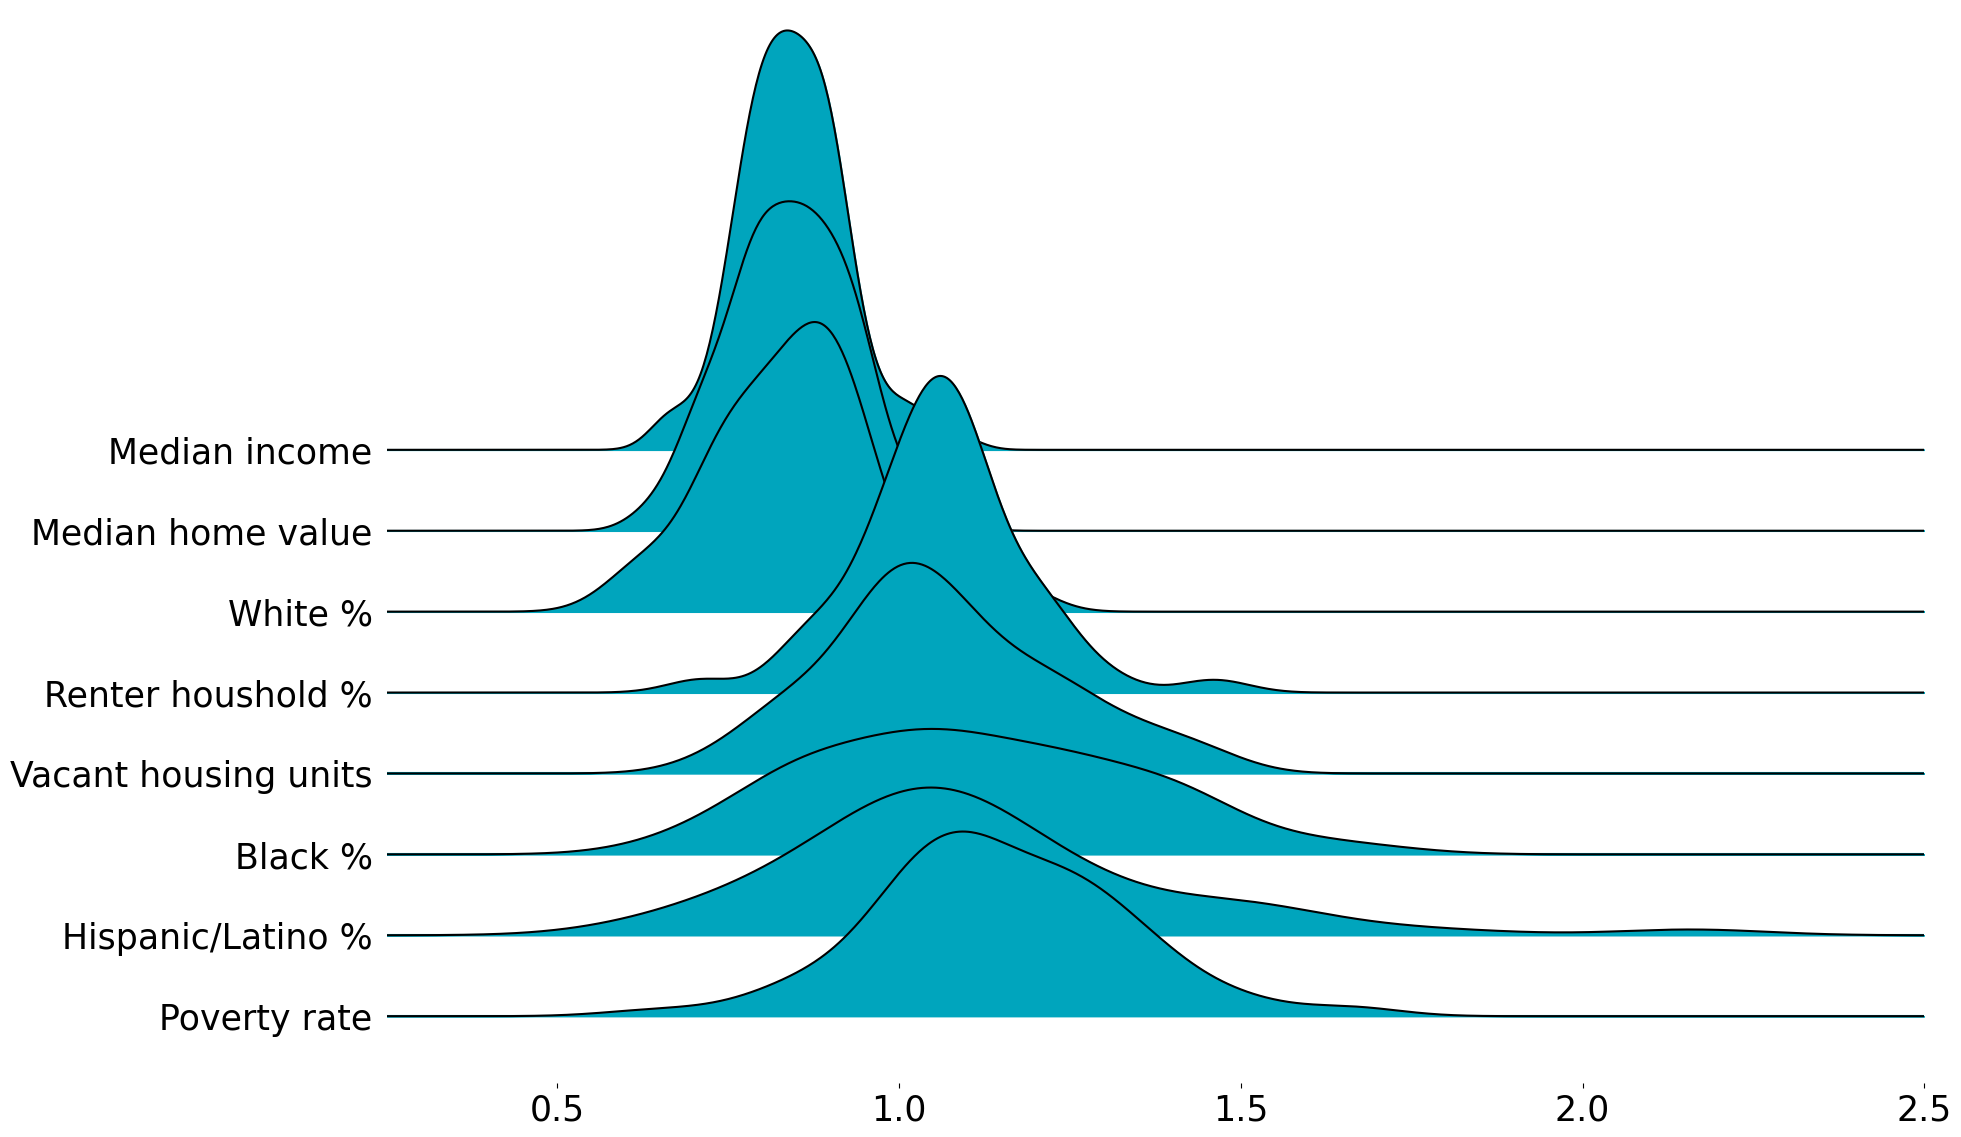

In [18]:
plt.rcParams.update({'font.size': 25})
fig, axes = joypy.joyplot(UA_stats[new_names[::-1]], color = "#00a5bd", figsize=(20,12), overlap=2.5)
plt.xlim(0.25, 2.5)
plt.show()

In [19]:
UA_stats[old_names].mean()

KeyError: "None of [Index(['pop_in_poverty_ratio', 'hispanic_pop_ratio', 'black_pop_ratio',\n       'vacant_units_ratio', 'renter_households_ratio', 'white_pop_ratio',\n       'median_home_value_ratio', 'median_hh_income_ratio'],\n      dtype='object')] are in the [columns]"

In [20]:
np.mean(UA_stats["Black %"] > 1)

0.7333333333333333

In [21]:
np.mean(UA_stats["White %"] > 1)

0.14285714285714285

In [22]:
np.mean(UA_stats["Median income"] > 1)

0.06666666666666667

In [23]:
UA_stats

,Unnamed: 0,UACE,UA_NAME,facility_count,White %,Black %,Hispanic/Latino %,Poverty rate,Renter houshold %,Vacant housing units,Median income,Median home value
12,12,70993,"Port Arthur, TX",28,1.348230,0.732163,0.625029,0.818380,0.864131,0.906692,1.101539,1.135087
14,14,6058,"Beaumont, TX",11,0.545791,1.354551,1.297023,1.468748,1.234082,1.433323,0.752667,0.623954
17,17,69192,"Phoenix West--Goodyear--Avondale, AZ",12,0.440954,1.454031,1.246726,1.199544,1.265560,0.642602,0.847188,0.821800
27,27,4384,"Austin, TX",22,0.921648,1.162192,1.133402,0.961915,0.851892,1.022021,1.103273,1.033041
34,34,51445,"Los Angeles--Long Beach--Anaheim, CA",121,0.709295,1.178831,1.220297,1.093183,0.973012,0.848717,0.897017,0.809943
...,...,...,...,...,...,...,...,...,...,...,...,...
976,976,37081,"Harrisburg, PA",13,0.717273,1.946543,1.780457,1.681714,1.389103,1.550345,0.803306,0.768985
1015,1015,79768,"Savannah, GA",11,0.713242,1.342852,0.849702,1.119053,1.057995,1.099166,0.827522,0.758788
1023,1023,41212,"Indianapolis, IN",32,0.840284,1.454945,1.494589,1.524791,1.215755,1.427532,0.688753,0.632338
1042,1042,61273,"Nashville-Davidson, TN",21,0.873991,1.387308,1.024379,1.605104,1.512121,1.767786,0.754177,0.942028
